# れんしゅう

## Cluster 20180613 

[1] Winston, Wayne L. Marketing Analytics: Data-Driven Techniques with Microsoft Excel. John Wiley & Sons, 2014.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style='white')

In [77]:
df = pd.read_csv(r'D:\datasets\cities.csv')
df.head()
#print(df.isnull().any()) #print(df.info())
df.describe()

,Black,Hispanic,Asian,Median,Unemploymentrate,Percapitaincome
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,24.346939,14.591837,6.040816,31.877551,7.020408,20.918367
std,18.110254,16.472096,11.144803,1.996170,2.688632,3.334396
min,1.000000,1.000000,1.000000,28.000000,3.000000,13.000000
25%,11.000000,3.000000,1.000000,30.000000,5.000000,19.000000
50%,22.000000,6.000000,2.000000,32.000000,7.000000,21.000000
75%,31.000000,23.000000,5.000000,33.000000,9.000000,23.000000
max,76.000000,69.000000,71.000000,37.000000,13.000000,31.000000


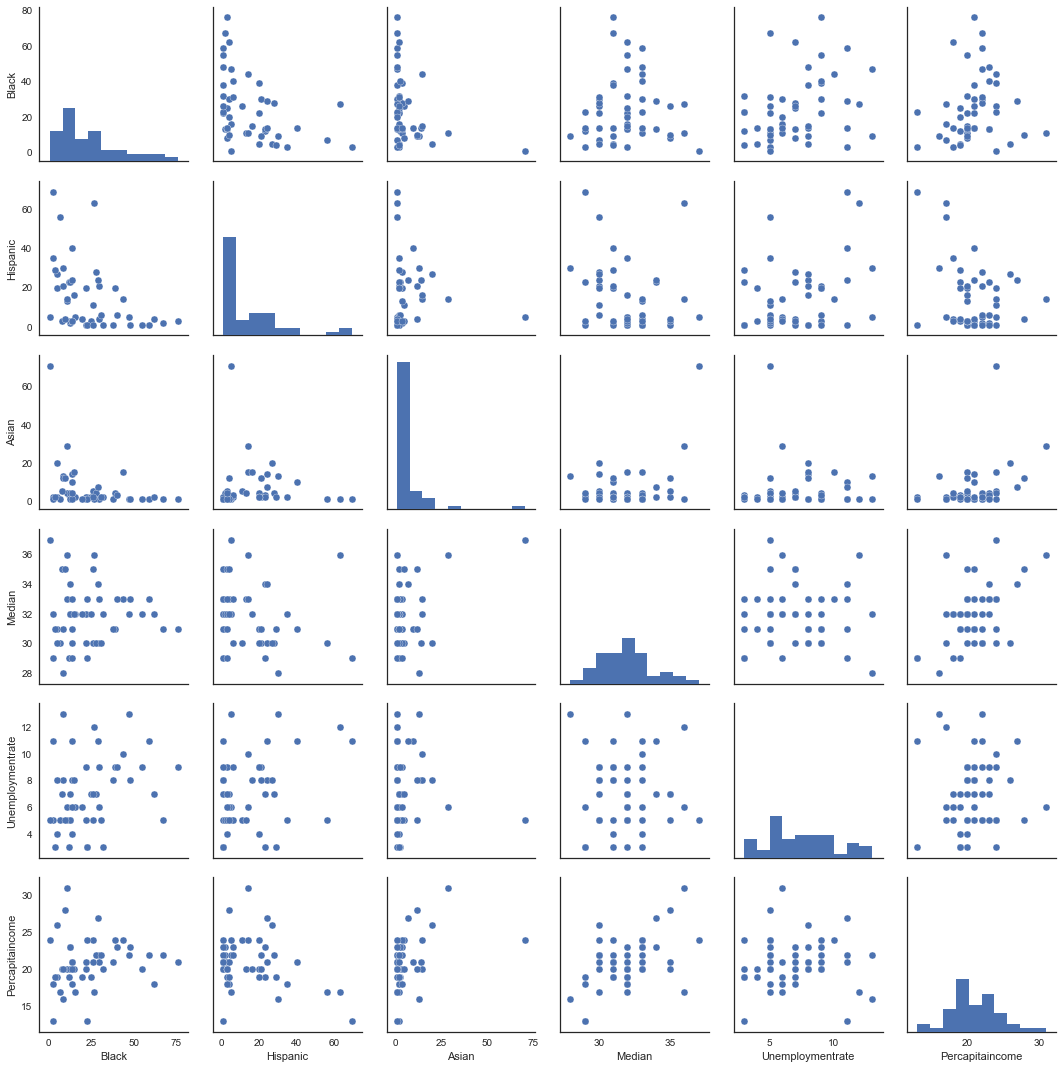

In [19]:
sns.pairplot(df)

In [78]:
X = df.drop('City', axis=1)
y = df['City']
#标准化
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)

### でーたぶんせき

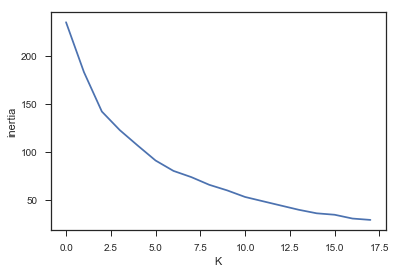

In [79]:
params = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    params.append(kmeans.inertia_)
plt.plot(params)
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

In [80]:
#使用Kmeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
#model.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
df['labels'] = model.labels_
df.head()

,City,Black,Hispanic,Asian,Median,Unemploymentrate,Percapitaincome,labels
0,Albuquerque,3,35,2,32,5,18,0
1,Atlanta,67,2,1,31,5,22,2
2,Austin,12,23,3,29,3,19,1
3,Baltimore,59,1,1,33,11,22,2
4,Boston,26,11,5,30,5,24,1


In [85]:
centers = pd.DataFrame(model.cluster_centers_,columns=[ 'Black', 'Hispanic', 'Asian', 'Median', 'Unemploymentrate','Percapitaincome'])
cm = sns.light_palette("pink", as_cmap=True)
centers.style.background_gradient(cmap=cm)

,Black,Hispanic,Asian,Median,Unemploymentrate,Percapitaincome
0,-0.560085,1.2282,0.128799,-0.599912,0.657191,-0.441437
1,-0.346123,-0.427696,-0.336112,-0.0103296,-0.759251,-0.249418
2,1.44977,-0.47589,-0.260564,0.146336,0.775228,0.403501
3,-0.949181,-0.424775,2.83691,2.08658,-0.633987,2.04482


In [70]:
df.groupby('labels')[['City', 'Black', 'Hispanic', 'Asian', 'Median', 'Unemploymentrate','Percapitaincome']].mean()
#df.pivot_table(['City', 'Black', 'Hispanic', 'Asian', 'Median', 'Unemploymentrate','Percapitaincome'],index='labels',aggfunc='mean')
#http://pandas.pydata.org/pandas-docs/stable/style.html

,Black,Hispanic,Asian,Median,Unemploymentrate,Percapitaincome
labels,,,,,,
0,17.035714,11.821429,4.214286,31.571429,5.642857,20.321429
1,48.769231,7.923077,3.076923,32.000000,9.076923,22.230769
2,12.000000,51.600000,5.200000,30.800000,10.400000,16.800000
3,7.333333,7.666667,37.333333,36.000000,5.333333,27.666667


### しょうぎょう ぶんせき
![](http://upload.ouliu.net/i/201806131134223qg1l.jpeg)
>锚点的z得分表示聚类的一个典型成员。你会发现
- 旧金山聚类是由其市民富裕、年迈以及亚洲裔为主的城市所组成
- 孟菲斯聚类是由具有高失业率的以非洲裔为主的城市所组成的
- 奥马哈聚类是由具有一些少数族裔的收入中等的城市所组成的
- 洛杉矶聚类是由具有高实业率的拉丁裔为主的城市所组成的

In [94]:
df.head()

,City,Black,Hispanic,Asian,Median,Unemploymentrate,Percapitaincome,labels
0,Albuquerque,3,35,2,32,5,18,0
1,Atlanta,67,2,1,31,5,22,2
2,Austin,12,23,3,29,3,19,1
3,Baltimore,59,1,1,33,11,22,2
4,Boston,26,11,5,30,5,24,1


In [130]:
df_1 = df
#标准化
for i in df_1.columns[1:7]:
    df_1[i + '_z'] = (df_1[i]-df_1[i].mean())/df_1[i].std()

df_1.head()

,City,Black,Hispanic,Asian,Median,Unemploymentrate,Percapitaincome,labels,city_z,Black_z,Hispanic_z,Asian_z,Median_z,Unemploymentrate_z,Percapitaincome_z
0,Albuquerque,3,35,2,32,5,18,0,Albuquerque,-1.178721,1.238954,-0.362574,0.061342,-0.751463,-0.875231
1,Atlanta,67,2,1,31,5,22,2,Atlanta,2.355188,-0.764434,-0.452302,-0.439617,-0.751463,0.324386
2,Austin,12,23,3,29,3,19,1,Austin,-0.681765,0.510449,-0.272846,-1.441536,-1.495336,-0.575327
3,Baltimore,59,1,1,33,11,22,2,Baltimore,1.913450,-0.825143,-0.452302,0.562301,1.480155,0.324386
4,Boston,26,11,5,30,5,24,1,Boston,0.091278,-0.218056,-0.093390,-0.940577,-0.751463,0.924195


In [132]:
citylist = ['Los Angeles','Omaha','Memphis','San Francisco']
anchor = df_1.loc[df['City'].isin(citylist),['City', 'Black_z', 'Hispanic_z',
       'Asian_z', 'Median_z', 'Unemploymentrate_z', 'Percapitaincome_z']]
anchor.style.background_gradient(cmap=cm)

,City,Black_z,Hispanic_z,Asian_z,Median_z,Unemploymentrate_z,Percapitaincome_z
23,Los Angeles,-0.57133,1.5425,0.355249,-0.439617,1.48015,0.024482
24,Memphis,1.69258,-0.825143,-0.452302,0.061342,0.736282,-0.275422
33,Omaha,-0.626548,-0.703726,-0.452302,0.061342,-0.751463,-0.275422
42,San Francisco,-0.736982,-0.0359297,2.06008,2.06518,-0.379527,3.02353
